# Visualising a dataset consisting a list of used Audi cars

### Task: 
1. Create a Pie Chart and a barplot for any categorical variable. Compare which plot is better and why? Use markdown cells to write your explanations. 
2. Make sure you have a proper title, xlabel, ylabel, xticks, yticks, and figure size which will represent an example of good data visualization.

### Importing required libraries

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
df = pd.read_csv("audi.csv")

In [3]:
df.info() #to see if any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


# *Pie chart of a categorical variable*

In [4]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


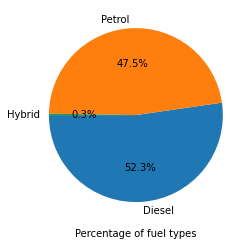

In [5]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.xlabel("Percentage of fuel types")
plt.show()

# *Barplot of a categorical variable*

In [6]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100
df_fuelType = df_fuelType.round(2)


display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


### Final plot:

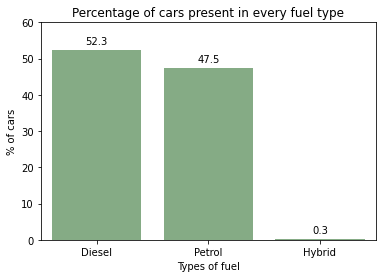

In [7]:
plot = sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="darkgreen",
            alpha=0.5)

#For adding annotations:
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in every fuel type")

plt.yticks(np.arange(0,70,10))

#show_values (plot)
plt.show()

## So the question is: Which plot is better?
I think that the barplot does a better job here in showing the percentage values of cars with a certain fuel type. This is because the hybrid portion in the pie chart is almost invisible as it covers a very less amount of area in the circle. On the other hand, in barplot there is a dedicated bar region for Hybrid cars even though it is very small. This way the barplot properly shows the presence of cars with Hybrid fuel type.